In [1]:
import os
from PIL import Image                       # package to manipulate and import images   
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch                                # package for deeplearning
from torch import nn
import torch.nn.functional as f
from torch.utils.data import DataLoader     # pytorch dataloader for easily loading minibatches during training
import torchvision                          # package for using images in deeplearning (computer vision)

from dataset import create_dataset, path_dict           # script for creating custom dataset

from preprocess import image_process

from nlp_preprocess import text_process

from pretrain_VAE import VAE

from tqdm import tqdm



Using TensorFlow backend.


# Exploring the Data (Images)  
### Convert single image to tensor and plot tensor

In [2]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') ### image path on local device

In [3]:
image.getpalette # images are CMYK instead of RGB

<bound method Image.getpalette of <PIL.JpegImagePlugin.JpegImageFile image mode=L size=707x594 at 0x1A4C7B3750>>

In [4]:
image.show() # view image

In [5]:
# to convert from CMYK to RGB
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [6]:
transform = torchvision.transforms.ToTensor() # create transform that changes image to tensor

In [7]:
image = transform(image) # transform image to tensor

In [8]:
image.size() # view image-tensor dimensions, there are 3 channels now (RGB) and the image 
             # is 400 pixels by 335 pixels

torch.Size([3, 594, 707])

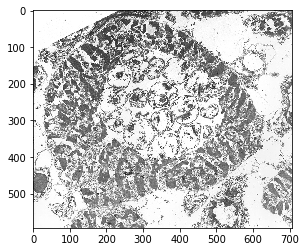

In [9]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image))   # plot image-tensor 
                                                                    #(note the same as origional image)

# Dataset Class   
### Changing images to tensors and create dataloader  
Class has been created. Here are the outstanding issues:  
      
  1) add option for varying image size (probably not neccessary)  
  2) need to add captions if they can be accessed 
  

#### Below is used for testing:

In [ ]:
##### train dataloader

In [22]:
#CREATE TRAIN DATASET CLASS

# Define arguments for train_dataset class
annotation_path = '/Users/ianleefmans/Desktop/data/train/part1/part1_2.json'
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path, 3329, 78)


#annotation = pd.read_json(annotation_path)

#create trainset
train_set = create_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor())



In [23]:
train_set[32794].size()

torch.Size([3, 491, 600])

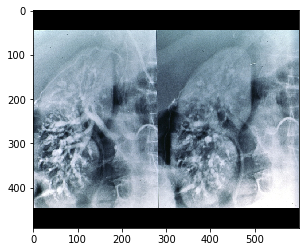

In [24]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(train_set[32794])) #plot indexed imaged
                                                                                         #from dataset 1716
    
                                                                                    # good test cases 841 , 1716

In [32]:
#define custom collate function

#def my_collate1(batch):
    #data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    #return data

    

# create dataloader
train_loader = DataLoader(dataset=train_set,
                      batch_size=4,
                      num_workers=4,
                      shuffle=False)
                      #collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [34]:
sample = iter(train_loader).next() #iterate to next minibatch from dataloader
print(sample[0].size()) # show size of one picture in the minibatch


torch.Size([3, 491, 600])


In [35]:
sample.size()

torch.Size([4, 3, 491, 600])

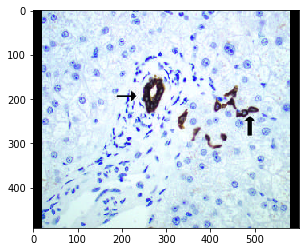

In [36]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample[3])) #plot image from minibatch

In [37]:
#### validation dataloader

In [38]:
annotation_path = '/Users/ianleefmans/Desktop/data/val/part3.json'
path = '/Users/ianleefmans/Desktop/data/val'
index_dict = path_dict(path,2424,25, training=False)


#annotation = pd.read_json(annotation_path)

#create trainset
val_set = create_dataset(annotation_path, index_dict, img_dir = path, 
                          transform = torchvision.transforms.ToTensor(), training=False)

In [39]:
#def my_collate(batch):
    #data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    #return data

# create dataloader
val_loader = DataLoader(dataset=val_set,
                      batch_size=4,
                      shuffle=True)
                      #collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [41]:
sample = iter(val_loader).next() #iterate to next minibatch from dataloader
print(sample[3].size()) # show size of one picture in the minibatch

torch.Size([3, 491, 600])


In [42]:
sample.size()

torch.Size([4, 3, 491, 600])

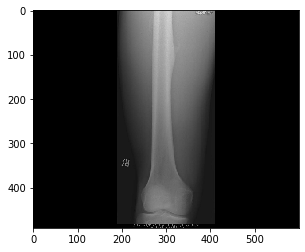

In [43]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample[3])) #plot image from minibatch

# Pretrain Class  
### Variational Autoencoder to train weights of CNN portion of the model  
Class has been created. Here are some outstanding issues:  
  
  1) need to add comments and description, clean up code



#### below is used for testing: 

In [51]:
y, mu, logvar = VAE(16).forward(sample)

In [52]:
y.size()

torch.Size([4, 3, 491, 600])

In [53]:
mu.size()

torch.Size([4, 54912])

In [54]:
logvar.size()

torch.Size([4, 54912])

# Image Preprocessing Class  
  
  Class has been created. Outstanding issues:  
    
  1) Gather image size information to determine best size to conform to  
       $\textit{*this is a testing issue class does not need to be altered}$

#### Image expansion testing

In [55]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/11/218.jpg') 
if image.mode != 'RGB':
    image = image.convert('RGB')
    
image.show()

In [57]:
# largest height: 1310
# largest width: 1544

# smallest height: 84
# smallest width: 60

avg_height = 491
avg_width = 600

preprocess = image_process((avg_height, avg_width))

In [58]:
image = preprocess.expand(image)
image.show()

In [59]:
image.getpalette

<bound method Image.getpalette of <PIL.Image.Image image mode=RGB size=584x491 at 0x108312790>>

In [60]:
transform = torchvision.transforms.ToTensor()
image = transform(image)

In [61]:
image2 = preprocess.uniform_size(image)

In [62]:
image2.size()

torch.Size([3, 491, 600])

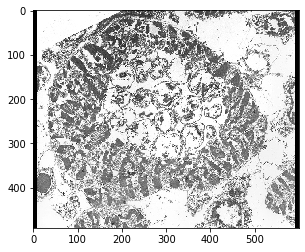

In [63]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image2))

#### Testing to find largest image dimensions

In [46]:
height = 9999999
width = 9999999
height_tot = 0
width_tot = 0
count = 0
for i in range(820):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
for i in range(886):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/img_'+str(i)+'.jpg')
        if image.height<height:
            height = image.height
        if image.width<width:
            width = image.width
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
    
path = '/Users/ianleefmans/Desktop/data/train'
index_dict = path_dict(path)
count_h=0
count_w=0
for i in range(3329):
    try:
        image = Image.open('/Users/ianleefmans/Desktop/data/train/part2/part2_images/'+str(index_dict[i])+ '/'+ str(i)+'.jpg')
        if image.height<height:
            height = image.height
        else:
            count_h+=1
        if image.width<width:
            width = image.width
        else:
            count_w+=1
        height_tot+= image.height
        width_tot+=image.width
        count+=1
        image.close()
    except:
        pass
    finally:
        pass
height_avg = height_tot/count
width_avg = width_tot/count


In [47]:
height

84

In [48]:
width

60

In [46]:
count_h

3329

In [47]:
count_w

3329

In [51]:
height_avg

491.0894357743097

In [52]:
width_avg

707.9197679071628

In [53]:
count

4998

In [55]:
(708+491)/2

599.5